<a href="https://colab.research.google.com/github/arthursuc/MetodosComputacionales1012/blob/main/Students/Sucerquia_1047/Actividades/Actividad03_Convergencia_Truncamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

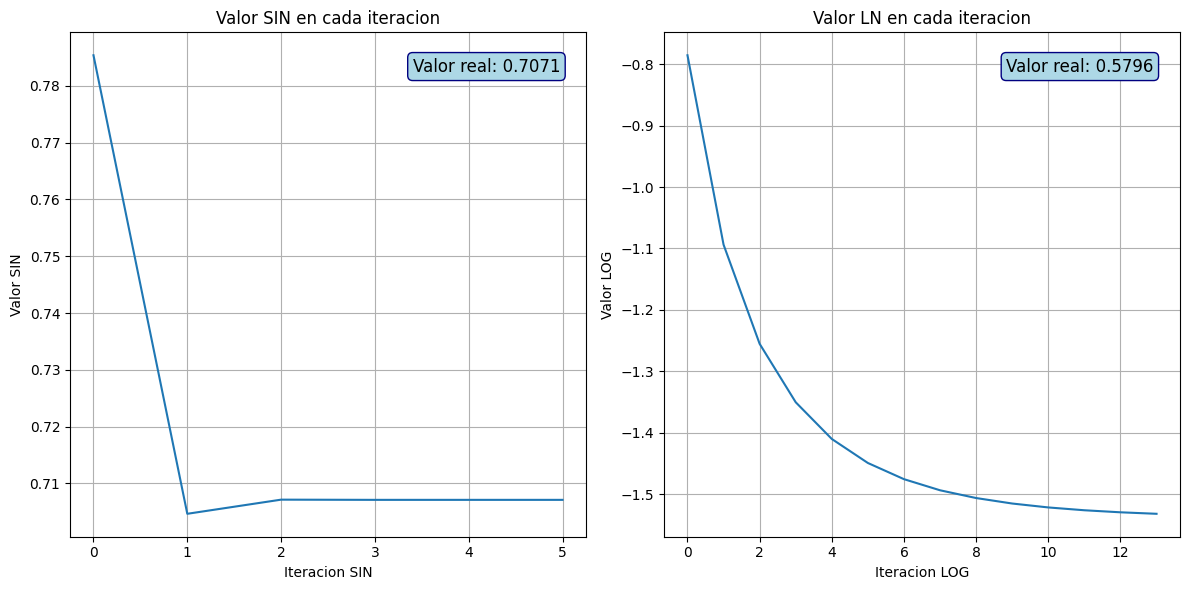

In [157]:
import math
import matplotlib.pyplot as plt
import numpy as np
def sin(x,iteraciones,epsilon):
  valores=np.array([])

  valor = 0
  valor_real = math.sin(x)
  i=0

  while i < iteraciones:
    n_esimo =(-1)**i/math.factorial(2*i+1)*x**(2*i+1)
    valor+= n_esimo
    if abs(n_esimo/valor) < epsilon:
      break
    i+=1
    valores = np.append(valores,valor)
  error_relativo = abs((valor_real-valor)/valor_real)
  valor_porcentual = error_relativo*100
  """No agrego el error relativo ni el porcentual al return porque queda innecesariamente largo,
      pero es fácil ver que puede accederse a ellos sin ningún problema"""
  return valor, i,valores


def logaritmo(x,iteraciones,epsilon):
  valores = np.array([])
  valor = 0
  valor_real = math.log(1+x)
  i=1

  while i < iteraciones:
    n_esimo = -1**(i-1)/i*x**i
    valor += n_esimo
    if abs(n_esimo/valor) < epsilon:
      break
    i+=1
    valores = np.append(valores,valor)

  error_relativo = abs((valor_real-valor)/valor_real)
  valor_porcentual = error_relativo*100

  return valor, i,valores


sen_pi,sen_iter,sen_vals=sin(math.pi/4,100,1e-10)

log_val,log_iter,log_vals = logaritmo(math.pi/4,15,1e-8)

sin_real = round(math.sin(math.pi/4),4)
log_real = round(math.log(1+math.pi/4),4)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(sen_vals)
axs[0].set_title("Valor SIN en cada iteracion")
axs[0].set_xlabel("Iteracion SIN")
axs[0].set_ylabel("Valor SIN")
axs[0].grid(True)
axs[0].text(0.95, 0.95, f"Valor real: {sin_real}",
        transform=axs[0].transAxes,
        ha='right', va='top',
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", edgecolor="navy"))



axs[1].plot(log_vals)
axs[1].set_title("Valor LN en cada iteracion")
axs[1].set_xlabel("Iteracion LOG")
axs[1].set_ylabel("Valor LOG")
axs[1].grid(True)
axs[1].text(2.1, 0.95, f"Valor real: {log_real}",
        transform=axs[0].transAxes,
        ha='right', va='top',
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", edgecolor="navy"))



plt.tight_layout()
plt.show()



# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



In [191]:
import sympy as sp


def serie_binomial(x,iteraciones,epsilon):
  valores = np.array([])
  valor = 0
  valor_real = 1.224744871
  i = 0.0
  while i < iteraciones:
    n_esimo = (sp.binomial(0.5,i))*x**i
    valor += n_esimo
    if abs(n_esimo/valor) < epsilon:
      break
    i+=1
    valores = np.append(valores,valor)
    #error relativo
  error_relativo = abs((valor_real-valor)/valor_real)
  print(f"El error relativo es {error_relativo}")
  #error porcentual
  error_porcentual = error_relativo*100
  print(f"El error porcentual es {error_porcentual} %")
  return valor,i,valores

El error relativo es 3.37578650291995E-10
El error porcentual es 3.37578650291995E-8 %
El error relativo es 0.00000517107880428493
El error porcentual es 0.000517107880428493 %
El error relativo es 0.000509311992048307
El error porcentual es 0.0509311992048307 %


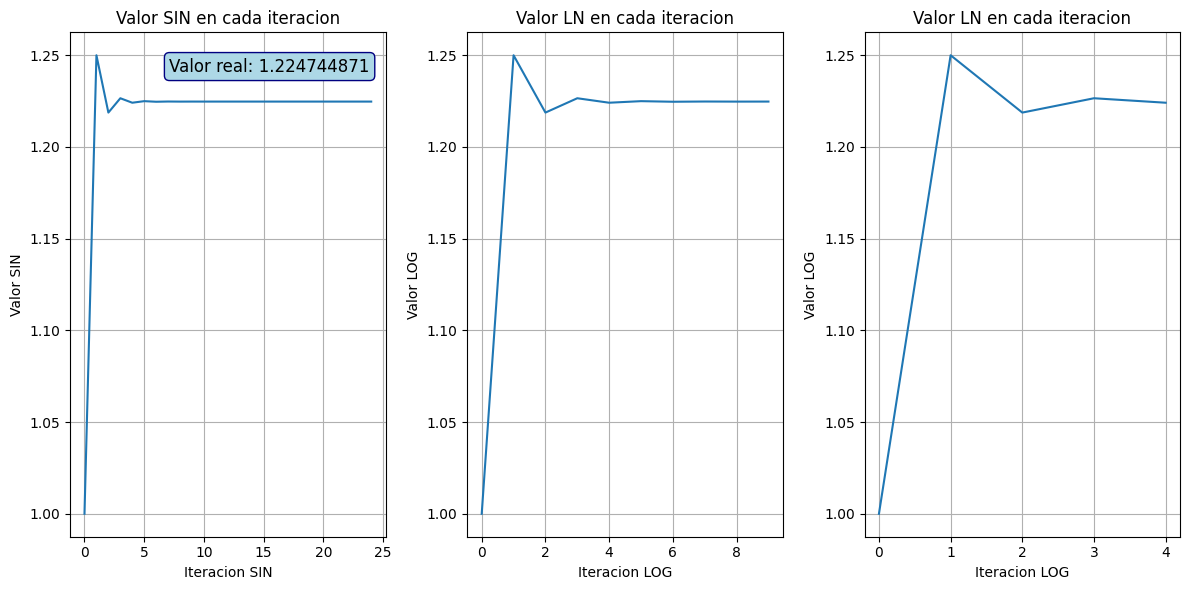

'De derecha a izquierda disminuyen las iteraciones utilizadas en cada caso, se puede ver que a un mayor número de iteraciones\nse acerca más al valor fijado en la tolerancia'

In [233]:
#Se evalua la funcion 3 veces con 3 numeros distintos de iteraciones
aproximacion1,iteraciones1,valores1= serie_binomial(0.5,100,1e-10)
aproximacion2,iteraciones2,valores2= serie_binomial(0.5,10,1e-10)
aproximacion3,iteraciones3,valores3= serie_binomial(0.5,5,1e-10)


fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].plot(valores1)
axs[0].set_title("Valor SIN en cada iteracion")
axs[0].set_xlabel("Iteracion SIN")
axs[0].set_ylabel("Valor SIN")
axs[0].grid(True)
axs[0].text(0.95, 0.95, f"Valor real: {1.224744871}",
        transform=axs[0].transAxes,
        ha='right', va='top',
        fontsize=12,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", edgecolor="navy"))



axs[1].plot(valores2)
axs[1].set_title("Valor LN en cada iteracion")
axs[1].set_xlabel("Iteracion LOG")
axs[1].set_ylabel("Valor LOG")
axs[1].grid(True)


axs[2].plot(valores3)
axs[2].set_title("Valor LN en cada iteracion")
axs[2].set_xlabel("Iteracion LOG")
axs[2].set_ylabel("Valor LOG")
axs[2].grid(True)



plt.tight_layout()
plt.show()

"""De derecha a izquierda disminuyen las iteraciones utilizadas en cada caso, se puede ver que a un mayor número de iteraciones
se acerca más al valor fijado en la tolerancia"""

El error relativo es 0.00489479167616776
El error porcentual es 0.489479167616776 %
El error relativo es 0.00148408786436963
El error porcentual es 0.148408786436963 %
El error relativo es 0.000188377957697969
El error porcentual es 0.0188377957697969 %
El error relativo es 0.0000122273696495581
El error porcentual es 0.00122273696495581 %
El error relativo es 0.00000222326178859836
El error porcentual es 0.000222326178859836 %
El error relativo es 1.90685010613513E-7
El error porcentual es 0.0000190685010613513 %
El error relativo es 1.72713701453623E-8
El error porcentual es 0.00000172713701453623 %


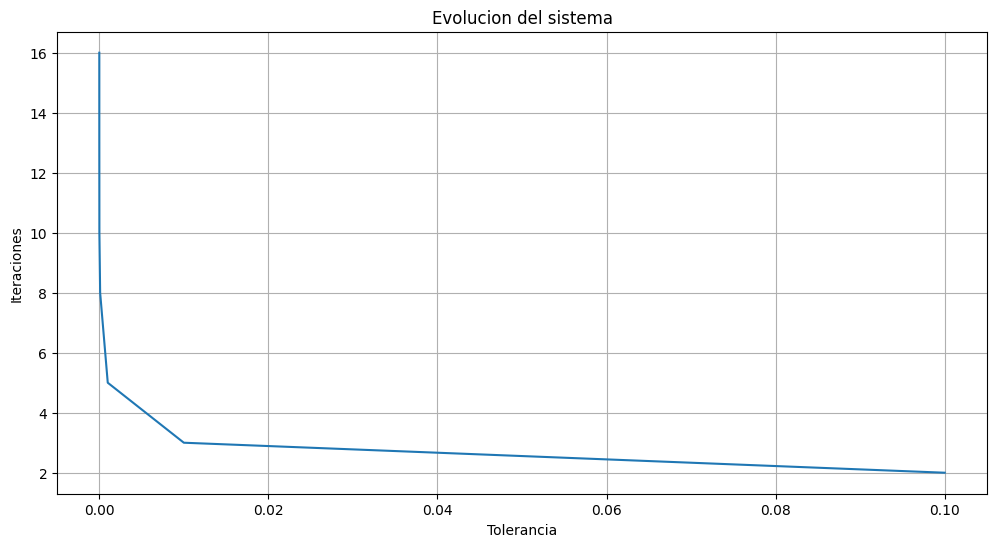

'Se puede ver que entre es más cercana a cero el epsilon, aumenta de forma cuasi exponencial las iteraciones necesarias\npara llegar a la tolerancia deseada'

In [231]:
tolerancias = np.array([1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])
iteraciones= np.array([])
for i in tolerancias:
  aprox,iter,vals=serie_binomial(0.5,100,i)
  iteraciones = np.append(iteraciones,iter)

fig,axs = plt.subplots(1,1,figsize=(12,6))
axs.plot(tolerancias,iteraciones)
axs.set_title("Evolucion del sistema")
axs.set_xlabel("Tolerancia")
axs.set_ylabel("Iteraciones")
axs.grid(True)
plt.show()

"""Se puede ver que entre es más cercana a cero el epsilon, aumenta de forma cuasi exponencial las iteraciones necesarias
para llegar a la tolerancia deseada"""